# Chapter 12      
# Why Inference is Important     

*"Critical tests of this kind may be called tests of significance, and when such tests are available we may discover whether a second sample is or is not significantly different from the first."*

Ronald A. Fisher [Fisher_1925]


## Inference In Rational Decision Process   

**Statistical inference** can be thought of as the process of making rational decisions based on data. The inference process is based on the analysis of probability distributions. Statistical inference can produce one or more of the following:   

- A **point estimate** of a most likely value. The most likely value can be computed by several methods. The **maximum likelihood estimate (MLE)** is often used in frequentist statistics. Whereas, the **[maximum a posteriori (MAP)]**(https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) estimate is used in Bayesian analysis.     
- An **interval** is a measure of uncertainty. In many cases, we must not be satisfied with simply a point estimate. To understand if an inference is meaningful we need to understand the interval of uncertainty. A **confidence interval** is used in frequentist statistics. Whereas, a **[credible interval]**(https://en.wikipedia.org/wiki/Credible_interval#:~:text=In%20Bayesian%20statistics%2C%20a%20credible,problems%20is%20the%20credible%20region.) is used in Bayesian analysis.     

We will explore the Bayesian concepts mentioned above in more detail later.   

Confusingly, the term statistical inference is applied in many contexts. Some examples of applications of statistical inference include the following:  

### Inference on differences in distributions   

In many practical cases, it is important to know if samples are drawn from the same distribution or not. A frequentist **hypothesis test** is applied to determine if differences in distribution are **statistical **. A **null hypothesis** is the hypothesis that the distributions are the same. The test determines if we can **reject** the null hypothesis with a certain confidence. We will have much more to say about hypothesis testing in the remainder of this chapter.       

### Inference for model parameters    

Many statistical models, including machine learning models, have unknown parameters for which the values must be estimated, a form of statistical inference. Further, the uncertainty of these parameter estimates is computed. A further inference is to determine which, of possibly many, parameters are significant in the model. We will return to this topic in the next section of this book.      

### Inference for prediction      

Traditionally, the goals and methods used for inference and prediction were considered separately. In recent decades this distinction has blurred to the point of being irrelevant. Particularly in the machine learning era we speak of inference and prediction interchangeably.   

Consider a common machine learning example, classification. Inference is used to determine the most likely class for each case of input values. Further, inference tools can be used to determine the confidence one should have in the result.             

Another example from machine learning is a prediction of numeric values; e.g. regression. In this case, the inference is for a numeric value given input values, or independent variables. In addition, the uncertainty of the prediction can be computed.  

## Confidence Intervals; the key to inference     

In frequentist statistics uncertainty of an inference is expressed in terms of a **confidence interval**. A confidence interval is defined as the expected range of a parameter estimate. First, we will work with **two-sided confidence intervals**. In later sections, we will explore **one-sided confidence intervals**.  

One way to understand confidence intervals is to look at the $\alpha/2$ and $1 - \alpha/2$ quantiles of a distribution. The confidence interval corresponds to the span of the distribution between these quantiles. In other words, $\alpha$ is the probability that the value of a random variable, $\mathbf{x}$, will be in the interval  $[\alpha/2, 1- \alpha/2]$.     

We can express a confidence interval for a random variable, $\mathbf{x}$, in terms of the probability as:  

$$1-\alpha = P \Big( Lower\ CI \ge \mathbf{x} \le Upper\ CI \Big)$$

An alternative view is to consider the probability of the observed values being outside of the confidence interval. The probabilities for the two-sided confidence intervals can be expressed in terms of the upper and lower quantiles of the confidence interval:    

$$\alpha/2  = P(x \ge Upper\ CI)\ \\ and \\\ \alpha/2 = P(x \le Lower\ CI)$$

In [1]:
## Import
from scipy.stats import norm
import numpy as np
import numpy.random as nr
import pandas as pd
from statistics import mean
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as smsp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2
from scipy.optimize import brentq
from itertools import combinations, product
from math import sqrt
%matplotlib inline

### Example; confidence intervals of the Normal distribution

We will illustrate the concept of confidence intervals with an example. The **cumulative distribution function (CDF)** of a standard Normal distribution, $N(0,1)$, is shown in the plot generated by the code below. This code executes these steps:   

- The cumulates of the CDF are computed. An anonymous function (a lambda) using the *cdf* method of [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is used to compute the cumulates.  
- The CDF is plotted along with horizontal lines showing the distribution within the range $[\alpha/2, 1.0 - \alpha/2]$.  
- The roots of the functions $CDF(x) - \alpha/2$ and $CDF(x) - 1 + \alpha/2$ are found. These roots are the lower and upper confidence intervals respectively. Vertical lines are plotted at these values of the variable $x$. The aforementioned  function for the CDF is used in the calculation.     
- Double-ended arrows with annotation are plotted to illustrate the confidence interval on the CDF.   


Confidence Interval at alpha = 0.05: lower: -1.96, upper:  1.96


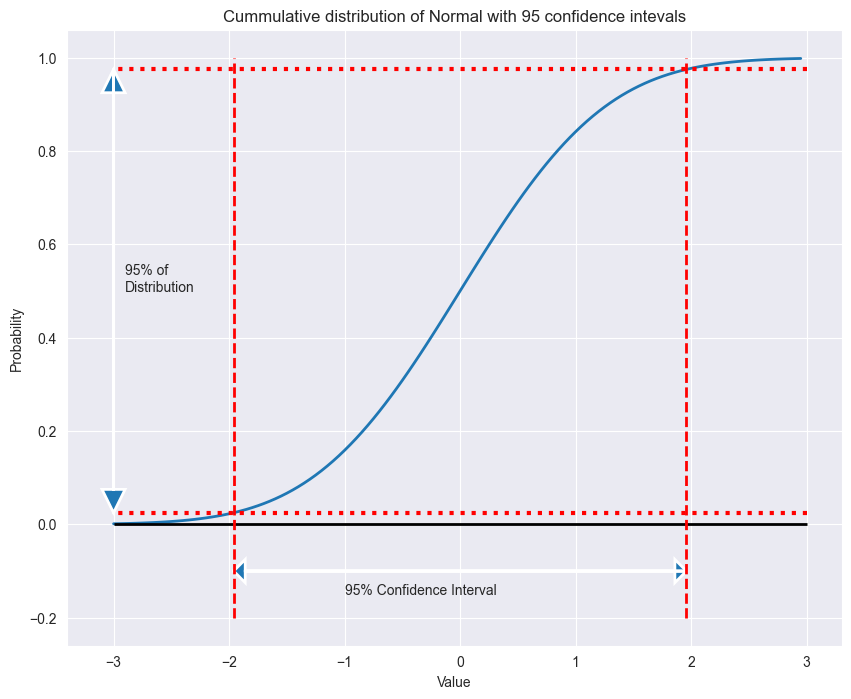

In [2]:
def plot_confidence(distribution, alpha, xmin, xmax, dist_type, step=0.05):
    ## Set the font size and compute the CI for display
    plt.rc('font', size=10)
    percent = str(int((1.0-alpha)*100))
    alpha = alpha/2.0 ## since working with 2-sided CIs
    
    ## first find the cumulates of the density  
    x = np.arange(start=xmin, stop=xmax, step=0.05)
    cumulates = distribution(x)
    
    ## plot the figure
    fig, ax = plt.subplots(figsize=(10, 8), )  
    ax.plot(x, cumulates, linewidth=2)
    ax.hlines(y=0.0, xmin=xmax, xmax=xmin, linewidth=2, color='black')
    ax.set_title('Cummulative distribution of ' + dist_type + ' with ' + percent + ' confidence intevals')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Value')
    
    ## Plot horizontal lines at the quantiles 
    ax.hlines(y=alpha, xmin=xmax, xmax=xmin, linewidth=3, color='r', linestyle='dotted')
    ax.hlines(y=1.0-alpha, xmin=xmax, xmax=xmin, linewidth=3, color='r', linestyle='dotted')
    
    ## Fine the probabilities at the quantiles and plot vertical lines   
    ## To do so, find the root of a function of the distribution
    lower_ci = brentq(lambda x: distribution(x) - alpha, xmin, xmax)
    ax.vlines(x=lower_ci, ymin=-0.2, ymax=1.0, linewidth=2, color='r', linestyle='dashed')
    upper_ci = brentq(lambda x: distribution(x) - 1 + alpha, xmin, xmax)
    ax.vlines(x=upper_ci, ymin=-0.2, ymax=1.0, linewidth=2, color='r', linestyle='dashed')
    
    ## Display the numeric results
    print("Confidence Interval at alpha = {0:3.2}: lower: {1:5.2f}, upper: {2:5.2f}".format(2*alpha,lower_ci, upper_ci))
    
    ## Place double headed arrows for the range and confidence interval
    ax.arrow(xmin,alpha,0.0,1-2*alpha-0.05, head_width=0.2, head_length=0.05, linewidth=2)
    ax.arrow(xmin,1.0-alpha,0.0,-1+2*alpha+0.05, head_width=0.2, head_length=0.05, linewidth=2)
    ax.text(xmin+0.1, 0.5, percent + '% of\nDistribution')
    ax.arrow(lower_ci,-0.1,upper_ci-lower_ci-0.1, 0, head_width=0.05, head_length=0.1, linewidth=2)
    ax.arrow(upper_ci,-0.1,-upper_ci+lower_ci+0.1, 0, head_width=0.05, head_length=0.1, linewidth=2)
    ax.text((upper_ci + lower_ci)/2-1.0, -0.15, percent + '% Confidence Interval')
    plt.show()

distribution = norm.cdf
plot_confidence(distribution, 0.05, -3.0, 3.0, 'Normal')

The chart shows the range of the 95% confidence interval for the CDF of the standard Normal distribution, $N(0,1)$. This means that for every 20 draws we perform from this distribution we expect 19 of them to be in the range of this confidence interval. On the other hand, we must keep in mind that we expect that 1 time in 20 a draw will be outside this range. Do not be fooled by this randomness!   

The 95% confidence interval is the most widely used, but there are many other possible choices. The **confidence interval chosen should fit the problem** at hand. In other words, what measure of uncertainty is appropriate? If one needs to have greater certainty that a value falls within a confidence interval a large value should be chosen; for example 99% or 0.99. But perhaps, the need for certainty is lower, so a smaller value can be chosen; for example 90% or 0.9.   

The foregoing example is specific to a Normal distribution, However, the concept of the confidence interval is commonly other distributions. For example, recall that the sample variance of a Normal distribution is $\chi^2$ distributed. It is generally useful to have an estimate of the confidence interval for this estimate.  

Do confidence intervals always exist as useful values? Quite simply, no. Some distributions have infinite variance. In this case, the confidence intervals are not bounded. However, in practice, this problem is not as bad as it sounds. In data analysis and computational statistics, we are always dealing with finite samples. Therefore the confidence intervals we compute are based on empirical estimates of statistics. The confidence interval will exist for nearly all empirical statistical estimates.   


> **Note:** There is not general agreement on how $\alpha$ is specified. In this book, we use the more common convention of specifying $\alpha$ as the quantile defining the limit of the confidence interval. This is why we say the probability of a random variable being within a two-sided confidence interval is $1 - 2 \alpha$. You will see some texts and even statistical software packages that use a different convention. In this case the probability of a random variable being within the confidence interval is $1 - \alpha$. The upper and lower quantiles are then at $\pm \alpha$. Make sure you are certain which convention the software you are using conforms with the correct convention.  

Let's work through a few examples to make these concepts clear.  We will start by computing the one-sided tail probability of a Normal distribution. In this case, we will look at the probability in the interval from $1.28155$ to infinity of the standard Normal distribution. Execute the code in the cell below and examine the result.  

In [3]:
# One tailed probability
def prob_normal(a, b, mean=0, sd=1):
    return(ss.norm.cdf(b, mean, sd) - ss.norm.cdf(a, mean, sd))
#prob_normal(20.1262055, float('inf'), 15, 4)
prob_normal(1.28155, float('inf'), 0, 1)

np.float64(0.10000027475074158)

The probability of the Normal distribution having a value greater than $1.28155$ is 0.10. This value is then the 0.10 cutoff. **The probability of a value of $1.281$ or greater is 0.10**.     

You can verify that the probability of the entire distribution is 1.0 by executing the code in the cell below.   

In [9]:
x = 'inf'
prob_normal(-float(x), float(x), 0, 1)

np.float64(1.0)

More typically in hypothesis testing, we set the cutoff and then must determine the value of the statistic. For example, what is the value for a standard Normal at the cutoff probability of 0.10. Execute the code in the cell below to find out. 

In [10]:
def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be between 0 and 1')
cutoff_stat(0.1, mean = 0.0, sd = 1.0)

np.float64(1.2815515655446004)

Not surprisingly the result is $1.28155$. As before, the probability of events of 1.28155 or greater is 0.10. Thus we call the value, $1.28155$, the **critical value**. 

> **Exercise 12-1:** To get a further feel for these projects you will now find and print the probability of a standard Normal along with the two-sided cut-off value for the following intervals:
> 1. -1 to 1
> 2. -2 to 2
> 3. -3 to 3    

In [17]:
## Put your code below
lower = [-1, -2, -3]
upper = [1, 2, 3]
for a,b in zip(lower, upper):
    pn = prob_normal(a, b)
    co = 1-pn
    print(f'For range {a} to {b}: pn = {round(pn,4)}, cutoff = {round(co,4)}')



For range -1 to 1: pn = 0.6827, cutoff = 0.3173
For range -2 to 2: pn = 0.9545, cutoff = 0.0455
For range -3 to 3: pn = 0.9973, cutoff = 0.0027


> **Exercise 12-2:** From the foregoing discussion it is clear that the value of alpha can be in the range $0 < \alpha < 1$. In the example, we explored the 95% confidence interval for the standard Normal distribution with $alpha = 0.05$. Now, make similar CDF plots to the foregoing example for the 90% and 99% confidence intervals. 

Confidence Interval at alpha = 0.1: lower: -1.64, upper:  1.64


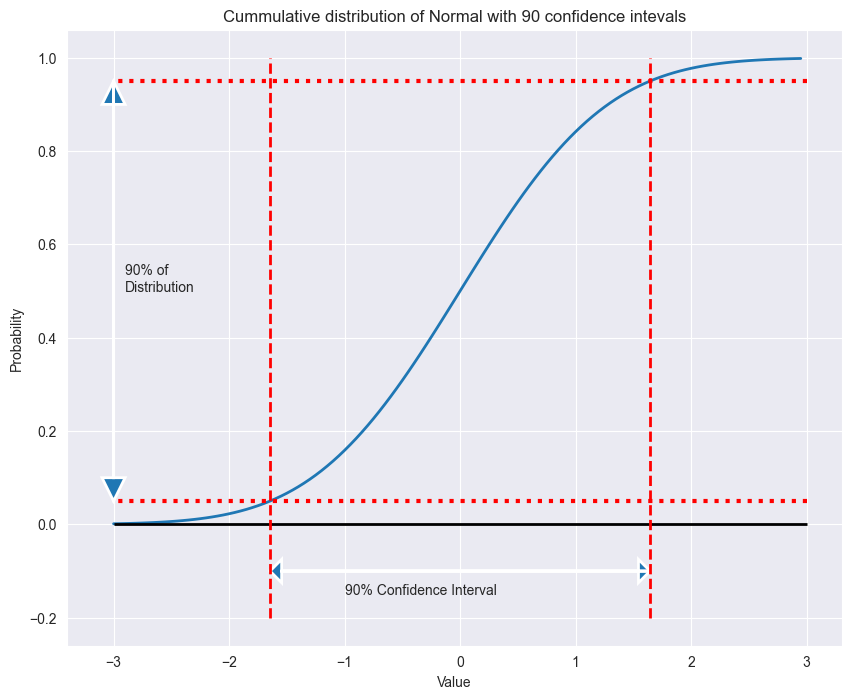

Confidence Interval at alpha = 0.01: lower: -2.58, upper:  2.58


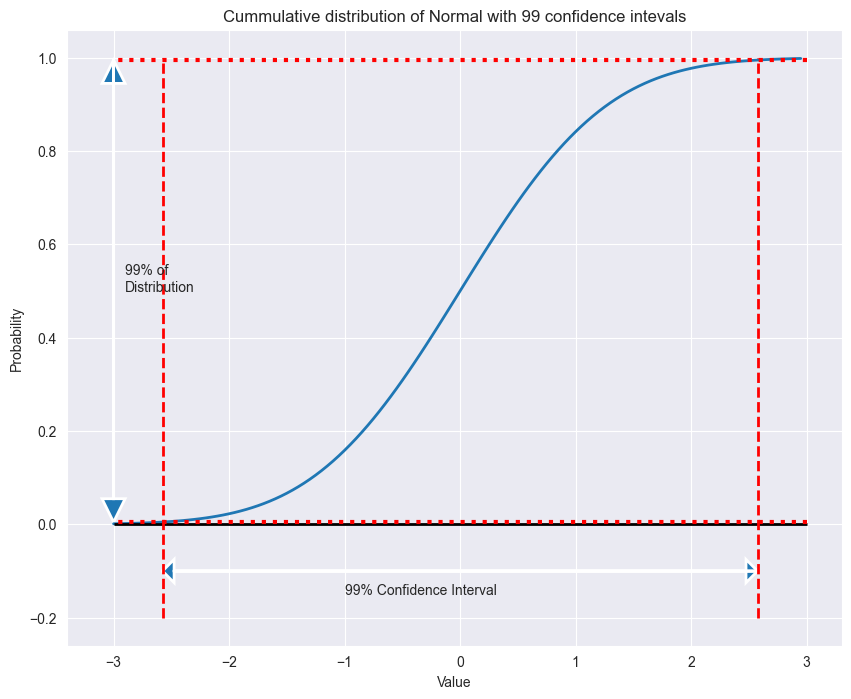

[None, None]

In [18]:
## Put your code below
distribution = norm.cdf
[plot_confidence(distribution, alpha, -3.0, 3.0, 'Normal') for alpha in [0.1, 0.01]]



> Answer the following questions:    
> 1. How is the symmetry of the Normal distribution manifest in the confidence intervals?          
> 2. Does it make sense that the confidence interval becomes wider as we reduce the probability that the value of the random variable will fall outside the confidence interval?       

> **Answers:** 
> 1. As a result of the symmetry of the Normal distribution, with $\mu=0$, the upper and lower CIs are symmetric about 0.   
> 2. Yes, as the confidence interval decreases there is more mass of the distribution beyond the confidence interval. 

## One-Sided Confidence Intervals    

So far, we have considered two-sided confidence intervals. But in many cases, we are interested in one side of the distribution or the other. We then work with a **one-sided confidence interval**.    

There are many situations where a one-sided confidence interval is useful. Often we want to know the maximum or minimum value of a random variable with a certain probability. For example, a financial portfolio manager will want to know the maximum losses 99% of the time. This statistic is known as **value at risk (VAR)**.       

When defining one-sided confidence intervals the bounds of the random variable must be considered. Take the example of a distribution with a possible range of values, $-\infty \le x \le \infty$, such as the Normal distribution. If the upper tail of the distribution is of interest, the confidence interval can be defined from the upper limit:  

$$\alpha = P\big( upper\ CI \ge x \le \infty \big)$$

A one-sided confidence can also be defined for the lower tail of a random variable. In this case, the confidence interval is defined:       

$$\alpha = P\big(-\infty  \ge x \le lower\ CI \big)$$

Now consider a distribution with a possible range of values $0 \ge x \le \infty$. Examples include the one-sided Normal distribution, the Poisson distribution, and the $\chi2$ distribution. In this case, we can define the confidence interval as:    

$$1 - \alpha = P\big( 0 \ge x \le upper\ CI \big)$$

> **Exercise 12-3:** As has been stated above, confidence intervals can be computed for almost any distribution, not just the Normal distribution. Now, you will make plots similar to the earlier example, but for the $\chi^2$ distribution, and with one-sided confidence intervalsn by doing the following:    
> 1. Complete the code in the `plot_confidence_one_sided` to compute the cumulates of the distribution.  
> 2. Iterate over all products of the degrees of freedom $[3,10]$ and $[\alpha = [0.01, 0.05, 0.10]$. You can find these product tuples using the [itertools.product](https://docs.python.org/2/library/itertools.html#itertools.product) function.
> 3. Inside the loop define an anonymous function (a lambda) using the [scipy.stats.chi2.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) to compute values of the CDF for $x$ values given the df. This function is used as the `distribution` argument to `plot_confidence_one_sided`.
> 4. Display the plots for an x-axis range of $0 \le x \le 30\}$. 

Confidence Interval for alpha = 0.01, and df =  3:  lower:  0.00, upper: 11.34


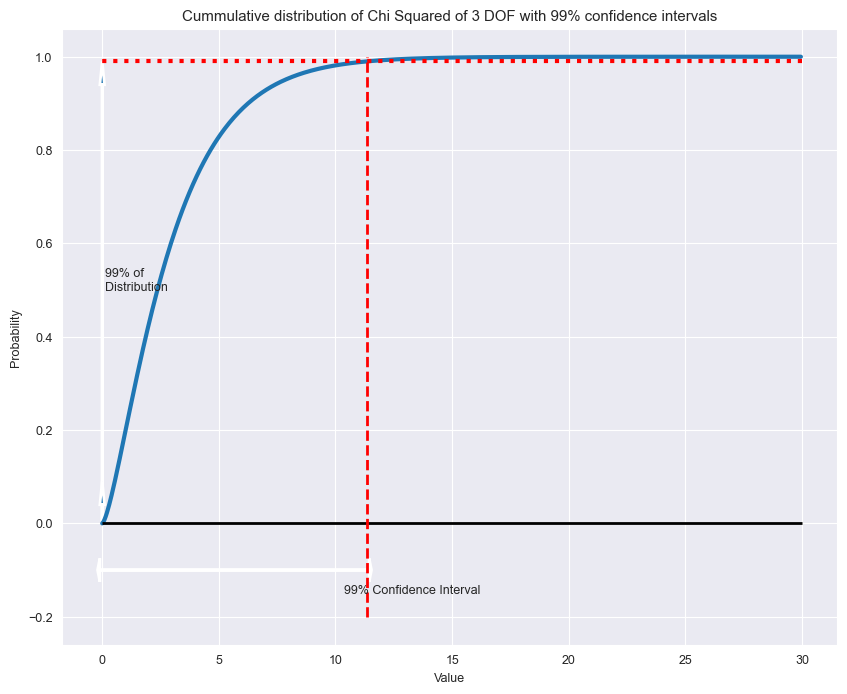

Confidence Interval for alpha = 0.01, and df = 10:  lower:  0.00, upper: 23.21


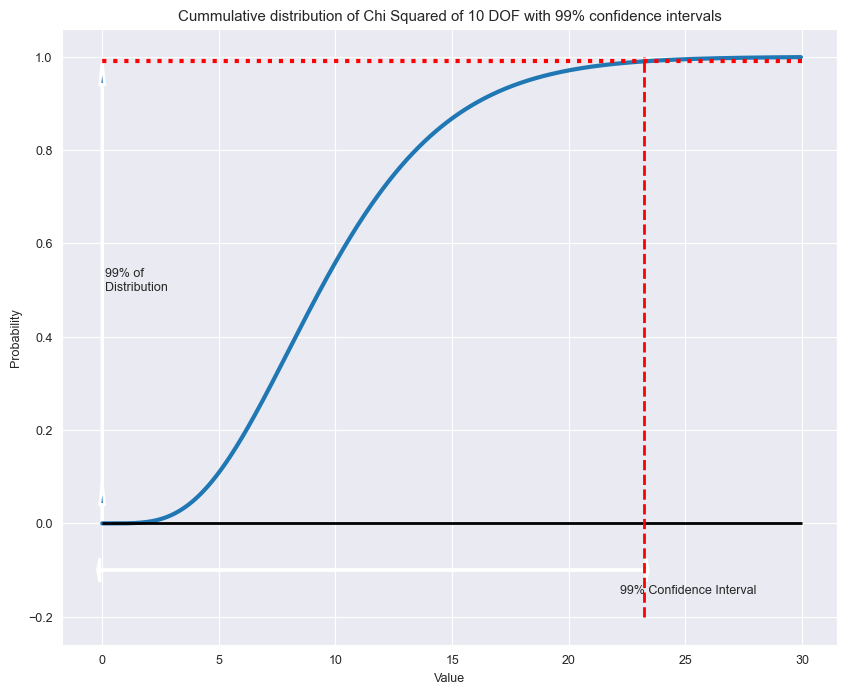

Confidence Interval for alpha = 0.05, and df =  3:  lower:  0.00, upper:  7.81


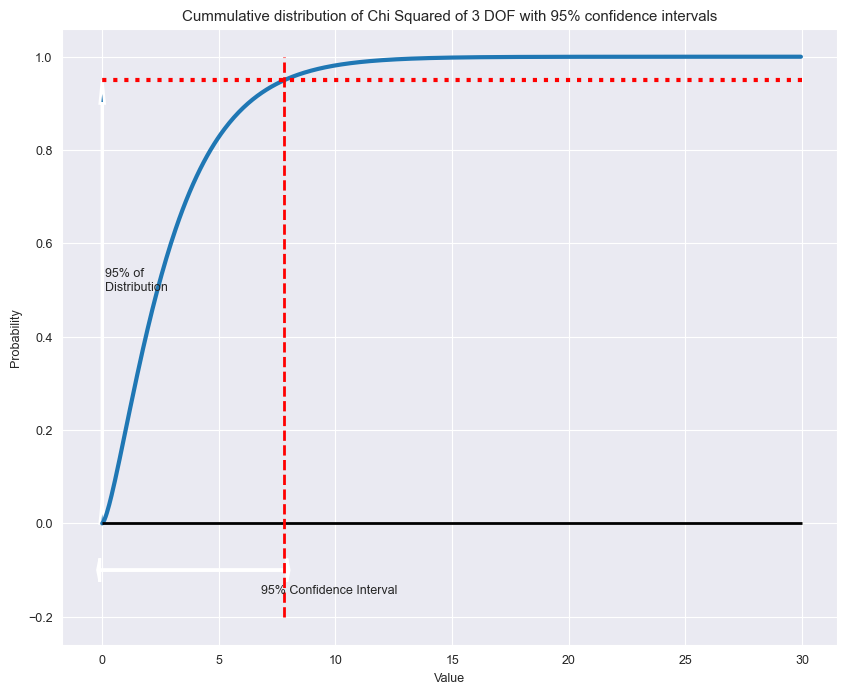

Confidence Interval for alpha = 0.05, and df = 10:  lower:  0.00, upper: 18.31


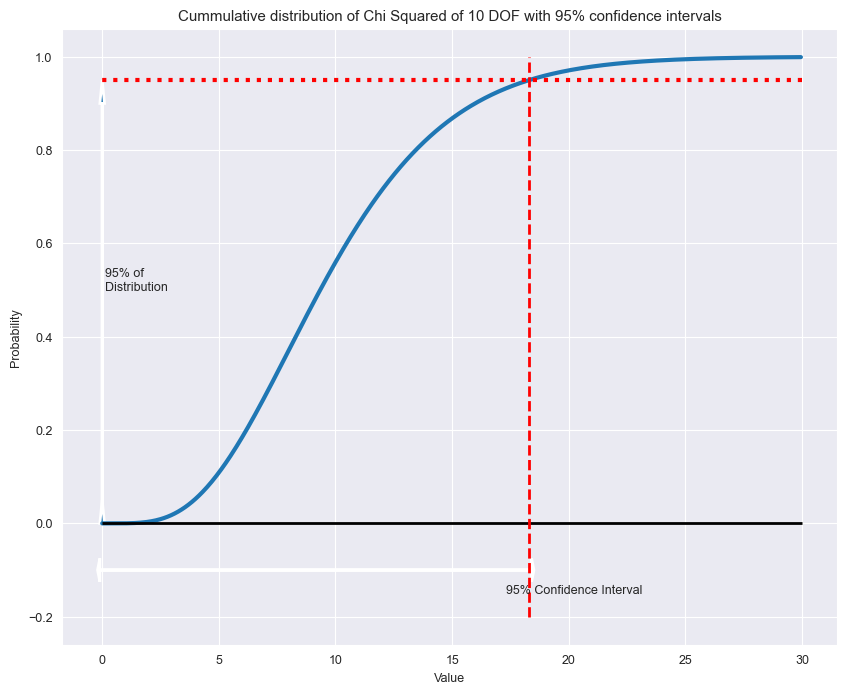

Confidence Interval for alpha = 0.10, and df =  3:  lower:  0.00, upper:  6.25


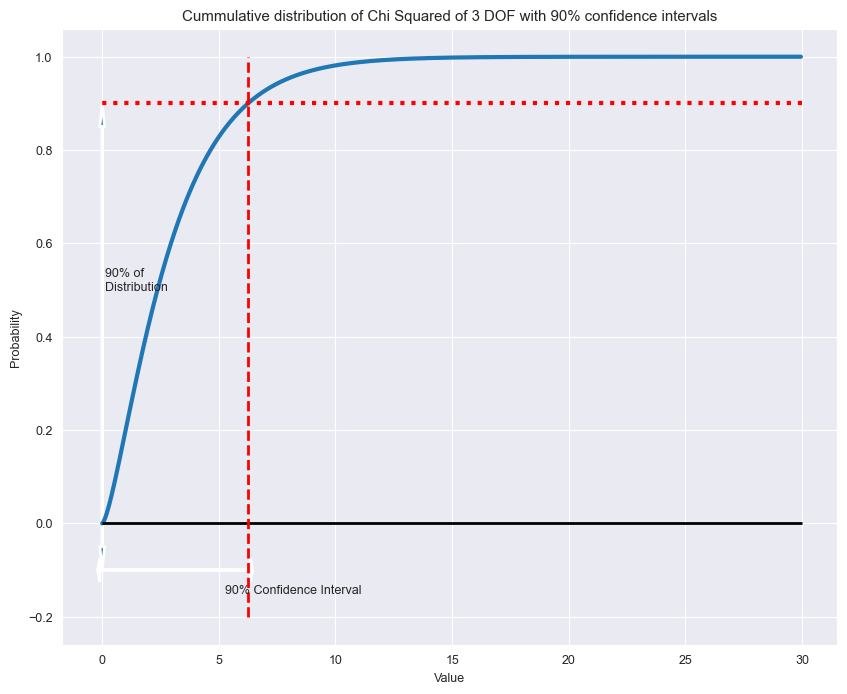

Confidence Interval for alpha = 0.10, and df = 10:  lower:  0.00, upper: 15.99


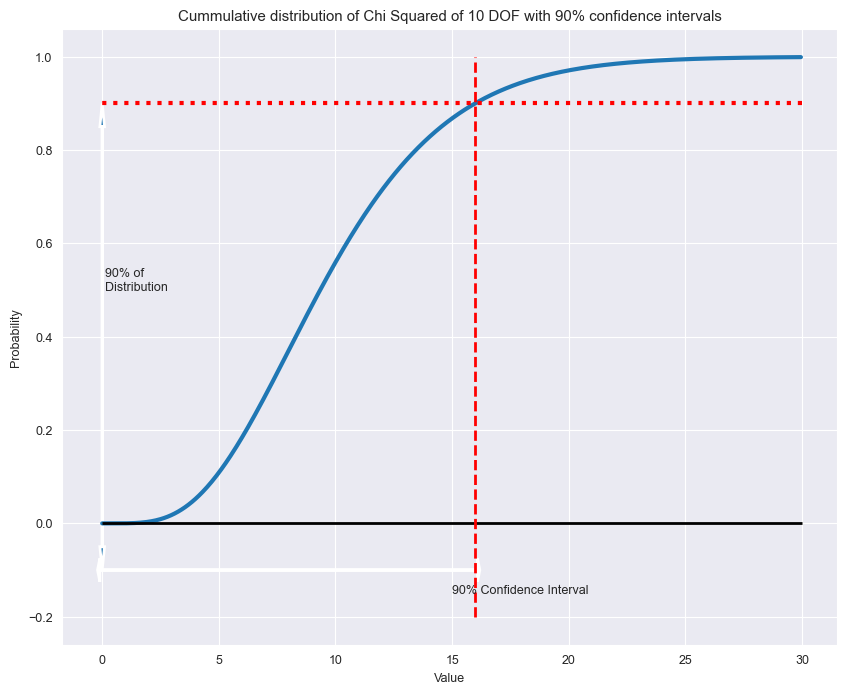

In [19]:
def plot_confidence_one_sided(distribution, alpha, xmin, xmax, dist_type, df, step=0.05):
    ## Set the font size and compute the CI for display
    plt.rc('font', size=9)
    percent = str(int((1.0-alpha)*100))
    
    ## first find the cumulates of the density  
    ## Complete the code in the lines below
    x =  np.arange(start=xmin, stop=xmax, step= step)   
    cumulates = distribution(x)
    
    ## plot the figure
    fig, ax = plt.subplots(figsize=(10, 8), )  
    ax.plot(x, cumulates, linewidth=3)
    ax.hlines(y=0.0, xmin=xmax, xmax=xmin, linewidth=2, color='black')
    ax.set_title('Cummulative distribution of Chi Squared of ' + str(df) +  ' DOF with ' + percent + '% confidence intervals')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Value')
    
    ## Plot horizontal lines at the quantiles 
    ax.hlines(y=1.0-alpha, xmin=xmax, xmax=xmin, linewidth=3, color='r', linestyle='dotted')
    
    ## Fine the probabilities at the quantiles and plot vertical lines   
    ## To do so, find the root of a function of the distribution
    upper_ci = brentq(lambda x: distribution(x) - 1 + alpha, xmin, xmax)
    ax.vlines(x=upper_ci, ymin=-0.2, ymax=1.0, linewidth=2, color='r', linestyle='dashed')
    
    ## Display the numeric results
    print("Confidence Interval for alpha = {0:3.2f}, and df = {1:2d}:  lower: {2:5.2f}, upper: {3:5.2f}".format(alpha, df, 0.0, upper_ci))
    
    ## Place double-headed arrows for the range and confidence interval
    ax.arrow(xmin,0.0,0.0,1-alpha-0.05, head_width=0.2, head_length=0.05, linewidth=2)
    ax.arrow(xmin,0.0,0.0,-alpha+0.05, head_width=0.2, head_length=0.05, linewidth=2)
    ax.text(xmin+0.1, 0.5, percent + '% of\nDistribution')
    ax.arrow(0.0,-0.1,upper_ci+0.1, 0, head_width=0.05, head_length=0.1, linewidth=2)
    ax.arrow(upper_ci,-0.1,-upper_ci-0.1, 0, head_width=0.05, head_length=0.1, linewidth=2)
    ax.text(upper_ci-1.0, -0.15, percent + '% Confidence Interval')
    plt.show()

## Put your code below
for (alpha,df) in product([0.01,0.05,0.10], [3,10]):
    distribution = lambda x: chi2.cdf(x, df=df)
    plot_confidence_one_sided(distribution, alpha, 0.0, 30.0, 'Chi Squared df = ' + str(df), df)

> Answer these questions:  
> 1. Why should these one-sided confidence intervals of the $\chi^2$ distribution all start at 0?  
> 2. Does it make sense that the confidence interval becomes wider as the degrees of freedom increase and why?    
> 3. Is it reasonable that the confidence intervals become wider as the value of $\alpha$ increases?   

> **Answers:**  
> 1. The $\chi^2$ distribution is defined on the interval $0 \le x \le \infty$, so a one-sided confidence interval will start at one of these extreme values, 0 in this case.  
> 2. Yes, as the scale of the $\chi^2$ distribution increases as the degrees of freedom increase, increasing the width of the confidence intervals.    
> 3. Yes, as $\alpha$ increases, the mass of the distribution within the confidence interval decreases as does the confidence interval.  

## The Central Limit Theorem

The **Central Limit Theorem** is a fundamental relationship which underpins many of the principles on which statistical methods are built. Put another way, without the Central Limit Theorem, much of what we do routinely in statistics would simply not work. Specifically:

- CLT enables sampling and resampling methods,
- Without a CLT we could not reliably compute confidence intervals for many common cases,
- Most statistical methods and machine learning algorithms rely on CLT. 

We will not go into detail on the derivation or proofs of the Central Limit Theorem (CLT). We will concentrate on the concepts. 

The key idea is that if we sample a population many times, the distribution of the mean of all samples is normally distributed, regardless of the population distribution. More formally, in a simple yet general form, we can write the CLT as:

$$\bar{X} = population\ mean = \mu$$

$$distribution(\bar{X})  \rightarrow  N(\mu, \frac{\sigma}{\sqrt{n}})$$

## History

The CLT has been around in many forms and refined for over two centuries. The first published version was by de Moiver in 1738. He proved a special case for Bernoulli trials.

<img src="../images/deMoiver.jpg" alt="Drawing" style="width:225px; height:300px"/>
<center>de Moiver's book of 1738</center>

Laplace published generalization of the CLT in 1776, 1785, and 1820. A rigorous proof, close to the modern form, was published by Chebyshev in 1887. Feller and Lévy worked on generalizations and some special cases into the mid-1930s. Any theorem that would attract the attention of so many mathematicians over so long a period of time must be important!

## A First Example of the CLT

Let's try an example. You will create and sample a distribution that is a **mixture of Normals**. By the CLT the distribution of the mean of the sample should be Normal, despite the original distribution.

### Generate mixture of Normals

The code in the cell below computes 2000 realizations of a distribution from a mixture of Normal distributions. Run the code and examine the kernel density estimation plot.

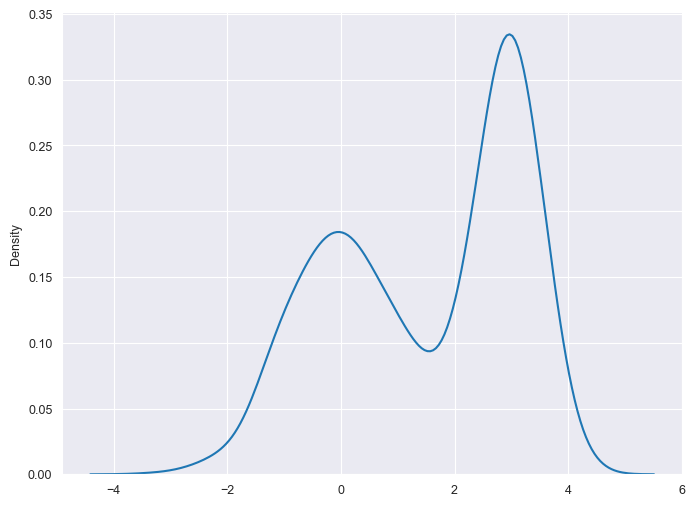

In [20]:
x = np.concatenate([
        np.random.normal(loc=0, scale=1, size=1000),
        np.random.normal(loc=3, scale=.5, size=1000)])
fig,ax = plt.subplots(figsize=(8,6))
sns.kdeplot(x, ax=ax);

The code in the cell below computes a list of 500 sample means from samples of size 50 from the population distribution. A histogram and Q-Q plot are created from the results are plotted. Run this code and examine the results.

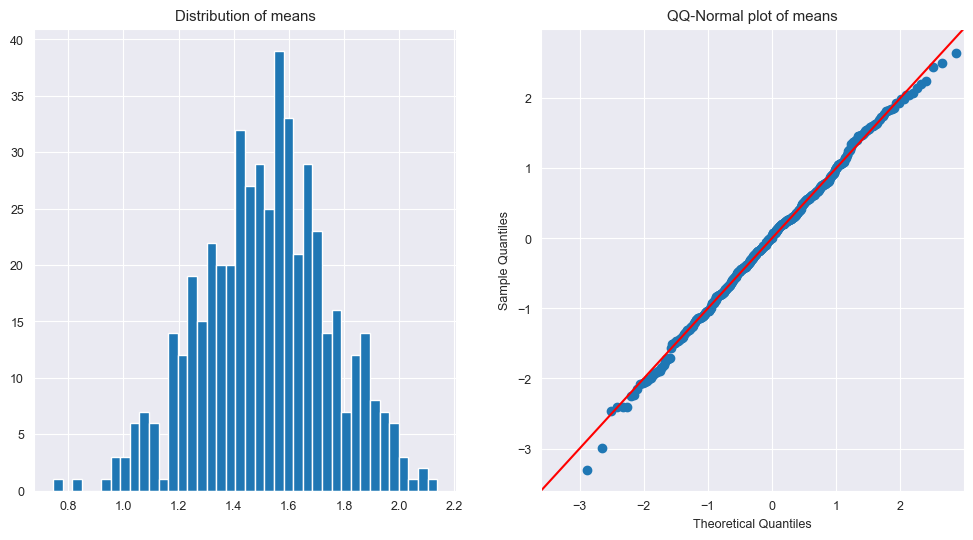

In [21]:
x_means = np.array([
        np.random.choice(x, size=50, replace=True).mean()
        for i in range(500)])

fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(x_means, bins=40);
ax[0].set_title('Distribution of means');
sm.qqplot(x_means, fit=True, line="45", ax=ax[1]);
ax[1].set_title('QQ-Normal plot of means');

The distribution of the sample means is close to Normal, even though the population is far from Normal. This demonstrates a result consistent with the CLT.   



> **Exercise 12-4:** As we have just demonstrated, CLT applies to the mean estimate of any distribution. You will now apply the CLT to compute the mean of 100 realizations of 500 samples of the standard Uniform distribution using [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html). the standard univorm distribution is on the range $0 \le x \le 1$.  Then display the histogram with 40 bins and Q-Q Normal plot of the mean estimates.      

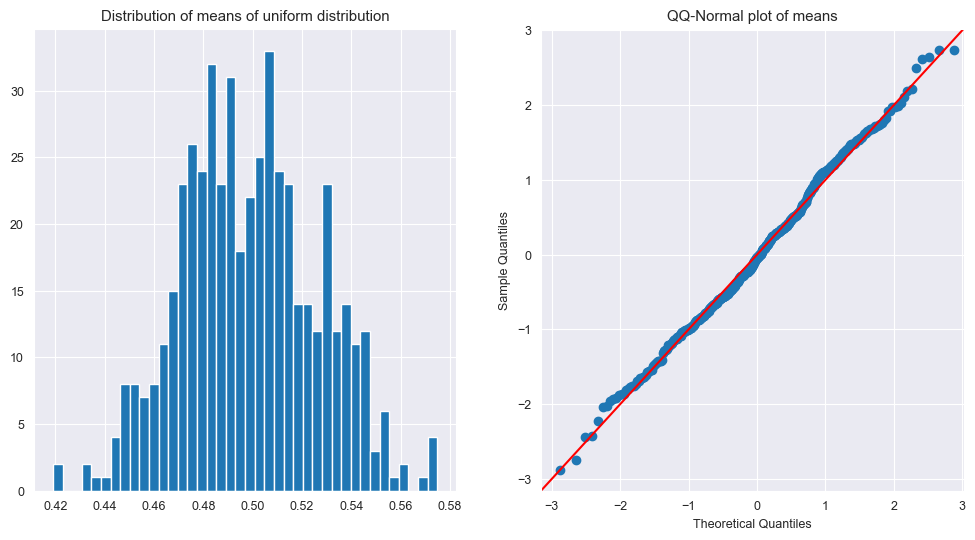

In [32]:
nr.seed(42)
## Put your code below
distribution = lambda x: nr.uniform(low=0, high=1, size = x)
num_realizations = 100
num_samps = 500

u_means = np.array([
    distribution(num_realizations).mean()
    for i in range(num_samps)
])

fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(u_means, bins=40);
ax[0].set_title('Distribution of means of uniform distribution');
sm.qqplot(np.array(u_means), fit=True, line="45", ax=ax[1]);
ax[1].set_title('QQ-Normal plot of means');    

> Are these results consistent with the CLT and why?    

> **Answer:**    Yes, these mean estimates are clearly Normally distributed, consistent with the CLT.   

## Example, Inference for the mean

Let's consider an example of confidence intervals for the mean. We have previously seen how the maximum likelihood estimate of the mean is Normally distributed. This fact makes computing the confidence intervals straightforward using the following relationship:      

$$CI(mean) = MLE(\theta | \mathbf{X})\ \pm\ \frac{MLE(s| \mathbf{X})}{\sqrt{n}} Z_\alpha$$

Here, $Z_\alpha$ is the standard Normal distribution with mean $MLR(\theta | \mathbf{X})$ evaluated at the confidence level, $\alpha$. The standard error is given by $s/ \sqrt{n}$, where $s$ is the standard deviation computed as $MLE(s| \mathbf{X})$. And $n$ is the number of samples.    

Keep in mind that the Normal distribution of the maximum likelihood estimate is an asymptotic; $n \rightarrow \infty$. For finite samples, particularly small samples, this relationship may be approximate. Further, the estimate of $s$ will have considerable uncertainty. 

> **Exercise 12-5:** To help develop an understanding of the behavior of confidence intervals for a mean estimate do the following:   
> 1. Using the above relationship compute the upper and lower confidence interval limits using the empirical mean and standard deviation of the samples of mean values you computed in Exercise 12-4.     
> 2. Print the mean and the confidence interval limits.    
> 3. Plot a histogram with vertical lines for the mean and confidence interval limits. Use [matplotlib.axes.Axes.axvline](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.axvline.html) to plot the vertical lines. Use distinctive line types for the mean and CI limits.          

Mean = 0.4989, with upper Ci = 0.4934, lower CI = 0.5043


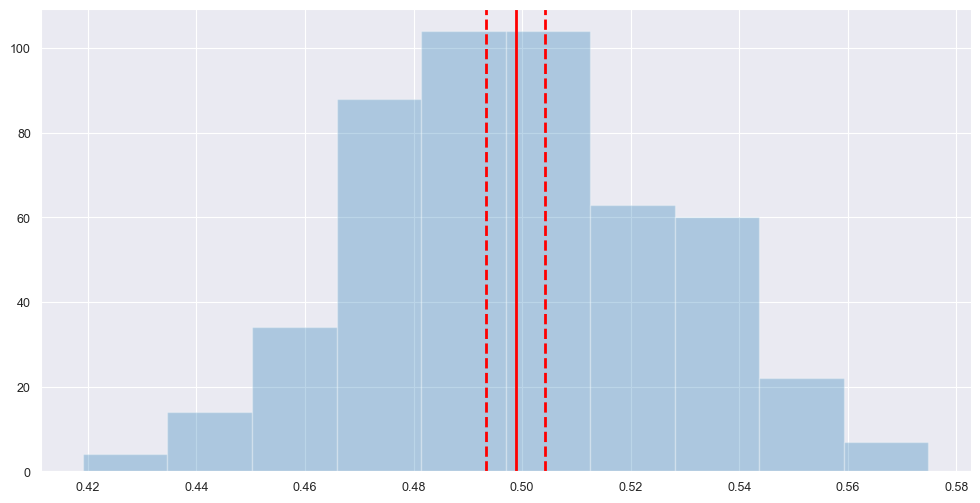

In [33]:
## Put your code below
std_means = np.std(u_means)
mean_means = np.mean(u_means)
ci = 1.96* std_means / sqrt(num_realizations)
ci_upper = mean_means + ci
ci_lower = mean_means - ci

print("Mean = {0:5.4f}, with upper Ci = {1:5.4f}, lower CI = {2:5.4f}".format(mean_means, ci_lower, ci_upper))




fig, ax = plt.subplots(figsize=(12,6))
ymin=0.0
ymax=15.0
ax.hist(u_means, alpha=0.3);
ax.axvline(x=mean_means, linewidth=2, color='r');
ax.axvline(x=ci_lower, linewidth=2,color='r', linestyle='dashed');
ax.axvline(x=ci_upper, linewidth=2, color='r', linestyle='dashed');

> Compared to the range of values of the means does the confidence interval seem narrow and why?       

> **Answer:**  There are several possible answers here. First, this is a mean of mean estimates and so is expected to have a narrow confidence interval by the Law of Large Numbers. Second, compared ot the mean value range of about 0.7, the CI is rather narrow.    

#### Copyright 2020, 2021, 2022, 2023 Stephen F. Elston. All rights reserved.        